# 预处理

- 调用适当的库

In [141]:
import pandas as pd # pandas库
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt # 可视化作图
import seaborn as sns # 可视化作图
# from pyecharts import Line # 可视化作图(Plus with Pyecharts)
from sklearn.preprocessing import StandardScaler, normalize # sklearn方法库(标准化、 归一化方法)
from sklearn.decomposition import PCA # sklearn库(PCA主成分分析法)
from sklearn.cluster import KMeans # sklearn库(K-Means聚类方法)
from sklearn.metrics import silhouette_score # sklearn库(计算轮廓系数方法)
import warnings # warnings库
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

- 读取.CSV文件

In [142]:
dataframe = pd.read_csv('data/student_sleep_patterns.csv')
# df = pd.read_csv(r'/kaggle/input/student-sleep-patterns/student_sleep_patterns.csv')

- 去除多余信息

In [143]:
# print(dataframe.columns)
dataframe = dataframe.drop(['Student_ID', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End'], axis=1)
# print(dataframe.columns)

- 提取关键信息

In [144]:
# print(dataframe)
dataframe['University_Year'] = dataframe['University_Year'].str.replace('st Year', '')
dataframe['University_Year'] = dataframe['University_Year'].str.replace('nd Year', '')
dataframe['University_Year'] = dataframe['University_Year'].str.replace('rd Year', '')
dataframe['University_Year'] = dataframe['University_Year'].str.replace('th Year', '')

dataframe['University_Year'] = dataframe['University_Year'].astype(int) # string to int

# 初步结果分析

- 结果分析(Sleep Quality with **Columns**)

    1. x轴: "Columns"
    2. y轴: Sleep Quality

In [145]:
from pyecharts.charts import Line
from pyecharts.options import TitleOpts
import pandas as pd

columns = ['Age', 'Gender', 'University_Year', 'Screen_Time', 'Caffeine_Intake']

for col in columns:
    # 按照每个字段分组求均值
    x = dataframe.groupby([col])['Sleep_Quality'].mean().reset_index()

    # 准备 x 轴标签和值
    x_labels = x[col].astype(str).tolist()
    y_values = x['Sleep_Quality'].tolist()

    # 创建折线图
    line = Line()
    line.add_xaxis(x_labels)
    line.add_yaxis("平均睡眠质量", y_values)
    line.set_global_opts(title_opts=TitleOpts(title=f"Sleep Quality by {col}"))

    # 输出为 HTML 文件（每个图一个文件）
    filename = f"sleep_quality_by_{col}.html"
    line.render(filename)
    print(f"图已保存为：{filename}")

图已保存为：sleep_quality_by_Age.html
图已保存为：sleep_quality_by_Gender.html
图已保存为：sleep_quality_by_University_Year.html
图已保存为：sleep_quality_by_Screen_Time.html
图已保存为：sleep_quality_by_Caffeine_Intake.html


- 结果分析(Which **Gender** take more caffeine?)

    1. Based on **Caffeine**

In [146]:
from pyecharts.charts import Bar
from pyecharts.options import TitleOpts, AxisOpts, LegendOpts

# 1. 统计数据：先做透视表（或交叉表）
grouped = dataframe.groupby(['Caffeine_Intake', 'Gender']).size().unstack(fill_value=0)

# 2. 提取横轴 & 两个性别的柱子高度
x_labels = grouped.index.tolist()
male_counts = grouped.get('Male', [0] * len(x_labels)).tolist()
female_counts = grouped.get('Female', [0] * len(x_labels)).tolist()

# 3. 构建柱状图
bar = Bar()
bar.add_xaxis(x_labels)
bar.add_yaxis("Male", male_counts)
bar.add_yaxis("Female", female_counts)

bar.set_global_opts(
    title_opts=TitleOpts(title="Which Gender Takes More Caffeine?"),
    xaxis_opts=AxisOpts(name="Caffeine Intake"),
    yaxis_opts=AxisOpts(name="Count"),
    legend_opts=LegendOpts(pos_top="5%")
)

# 4. 保存为 HTML
bar.render("性别咖啡因摄入柱状图.html")
print("图已保存为：性别咖啡因摄入柱状图.html")

图已保存为：性别咖啡因摄入柱状图.html


- 结果分析(**Disturbution of University Year** \& **Gender**)

    1. Based on **University Year**
    2. Based on **Gender**

In [ ]:
# plt.figure(figsize=(4, 3), dpi=200)
# dataframe['University_Year'].value_counts().plot(kind='pie', stacked=True,  figsize=(9,6), autopct='%1.1f%%')
# plt.show()

# plt.figure(figsize=(4, 3), dpi=200)
# dataframe['Gender'].value_counts().plot(kind='pie', stacked=True,  figsize=(9,6), autopct='%1.1f%%')
# plt.show()

'/Users/quzinan/Downloads/Code/Lecture/Python/Proj/性别分布.html'

# 模型训练

- 对"dataframe"中的数据进行"**独热编码**"

    1. 独热编码:    Text data to Numerical data

In [148]:
X = pd.get_dummies(dataframe)

- 特征标准化

In [149]:
scaler = StandardScaler() # 创建一个标准化器对象

scaled_X = scaler.fit_transform(X) # 先fit再transform

- 归一化操作

In [150]:
normalized_X = normalize(scaled_X) # 按行进行"归一化"

normalized_X = pd.DataFrame(normalized_X) # 将normalized_X 转化为dataframe

- 利用PCA(主成分分析)对高维特征进行降维处理

In [151]:
pca = PCA(n_components = 2) # 设定PCA降低后的维度

X_pca = pca.fit_transform(normalized_X) # 将归一化后的normalized_X进行PCA降维
X_pca = pd.DataFrame(X_pca) # 将X_pca转化为dataframe

X_pca.columns = ['P1', 'P2'] # 将列名设为第一主成分、第二主成分

X_pca # 输出 X_pca

,P1,P2
0,-0.223946,0.579331
1,0.623364,-0.055017
2,0.511652,-0.149136
3,-0.157796,0.686964
4,0.473896,-0.334482
...,...,...
495,0.624009,0.077817
496,0.480913,-0.244781
497,0.430725,-0.269312
498,-0.347041,-0.516294


# 最终结果分析

- 结果分析()

    1. Based on PCA(主成分分析)

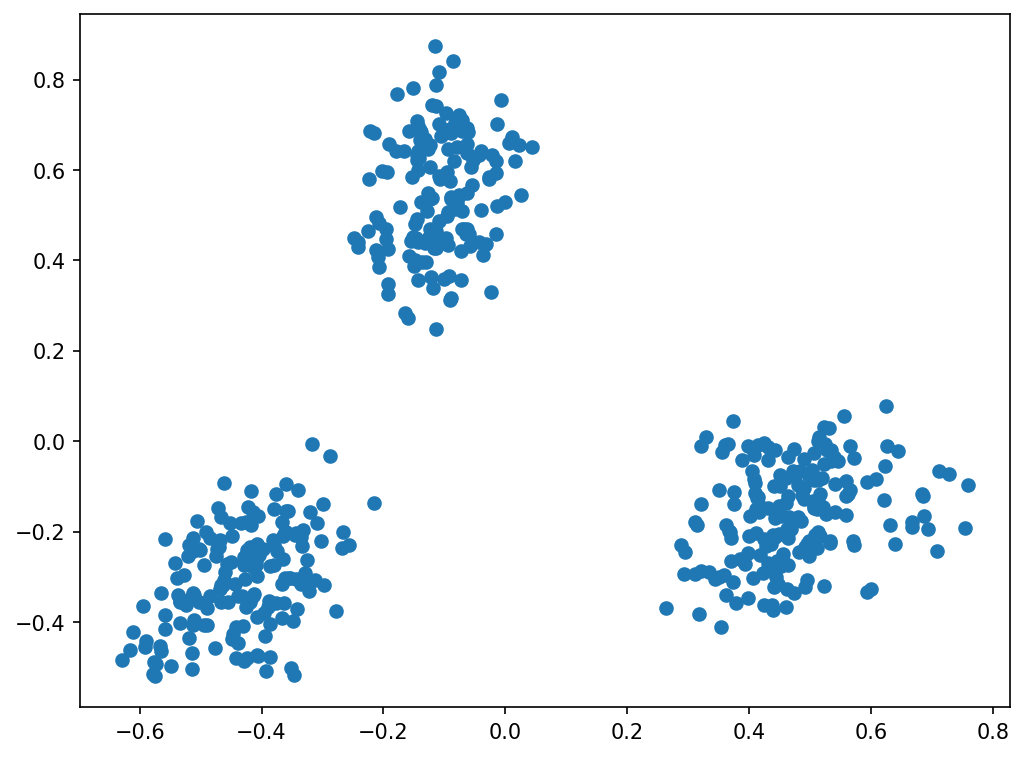

In [152]:
plt.figure(figsize=(8,6), dpi=150) # 设置图片格式
plt.scatter(X_pca['P1'], X_pca['P2']) # x: 第一主成分、y: 第二主成分
plt.show() # 绘图


- 通过计算轮廓系数(Silhouette Score)确定 K-Means 聚类的最佳簇数(K值)

In [153]:
silhouette_scores = [] # 存储每个K值对应的轮廓系数

best_k = None # 记录最佳K值
best_silhouette_score = -1 # 初始化为-1 (最佳轮廓系数范围在[-1, 1])

for k in range(2, 20):
    # 训练 K-means 模型
    model = KMeans(n_clusters=k, random_state=15)
        # n_clusters: 当前测试的簇数
        # random_state = 15: 固定随机种子, 保证结果可以复现
    model.fit(X_pca)
        # X_pca: PCA降维后的二维数据
    
    # 计算轮廓系数
    silhouette_avg = silhouette_score(X_pca, model.labels_)  
    silhouette_scores.append(silhouette_avg)

    # 更新最佳k值
    if silhouette_avg > best_silhouette_score:
        
        best_k = k
        best_silhouette_score = silhouette_avg

# 输出结果
print("Best K -->", best_k) # 输出最佳k值
print("Best Silhouette Score:", best_silhouette_score) # 输出最佳轮廓系数

Best K --> 3
Best Silhouette Score: 0.7972060847569669


- 通过计算轮廓系数(Silhouette Score)评估不同簇数(K值)下的K-means聚类效果

In [154]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from pyecharts.charts import Bar
from pyecharts.options import TitleOpts, LabelOpts, AxisOpts

# 计算轮廓系数
silhouette_scores = [] 
k = list(range(2, 20))  # 聚类数范围

for n_cluster in k:
    score = silhouette_score(X_pca, KMeans(n_clusters=n_cluster, random_state=42).fit_predict(X_pca))
    silhouette_scores.append(score)

# 构造柱状图
bar = Bar()
bar.add_xaxis([str(i) for i in k])  # 转为字符串作为横轴标签
bar.add_yaxis("Silhouette Score", silhouette_scores)

bar.set_global_opts(
    title_opts=TitleOpts(title="不同聚类数下的轮廓系数"),
    xaxis_opts=AxisOpts(name="聚类数 K"),
    yaxis_opts=AxisOpts(name="轮廓系数"),
)

# 保存为 HTML 文件
bar.render("轮廓系数柱状图.html")
print("已保存为：轮廓系数柱状图.html")

已保存为：轮廓系数柱状图.html


- 使用 K-Means 对数据进行聚类分析

In [155]:
# 初始化 K-Means 模型
kmeans = KMeans(n_clusters=3, random_state=15)
    # n_cluster = 3: 将数据分为3个簇
    # random_state = 15: 固定随机种子, 根据轮廓系数或实际进行调整

# 训练模型并预测簇标签
kmeans_predx = kmeans.fit_predict(X_pca)

# 将簇标签添加到数据中
X_pca["Cluster"] = kmeans_predx # 将簇标签添加到降维后的数据
dataframe["Cluster"] = kmeans_predx # 将簇标签添加到原始数据

- 输出 K-Means 聚类模型的SSE(Sum of Squared Errors, 误差平方和)以评估聚类效果

In [156]:
sse_km = kmeans.inertia_ # 获取当前模型的sse
print(f'SSE --> {sse_km}') # 打印当前模型的sse

SSE --> 10.087248805287919


- 计算并输出 K-Means 聚类效果的轮廓系数(Silhouette Score)以评估聚类效果的质量

In [157]:
silhouette_km = silhouette_score(X_pca, kmeans_predx) # 计算轮廓系数
print(f'Silhouette_score --> {silhouette_km}') # 输出轮廓系数

Silhouette_score --> 0.8691094735816867


- 结果分析()

    1. Based on PCA(主成分分析)

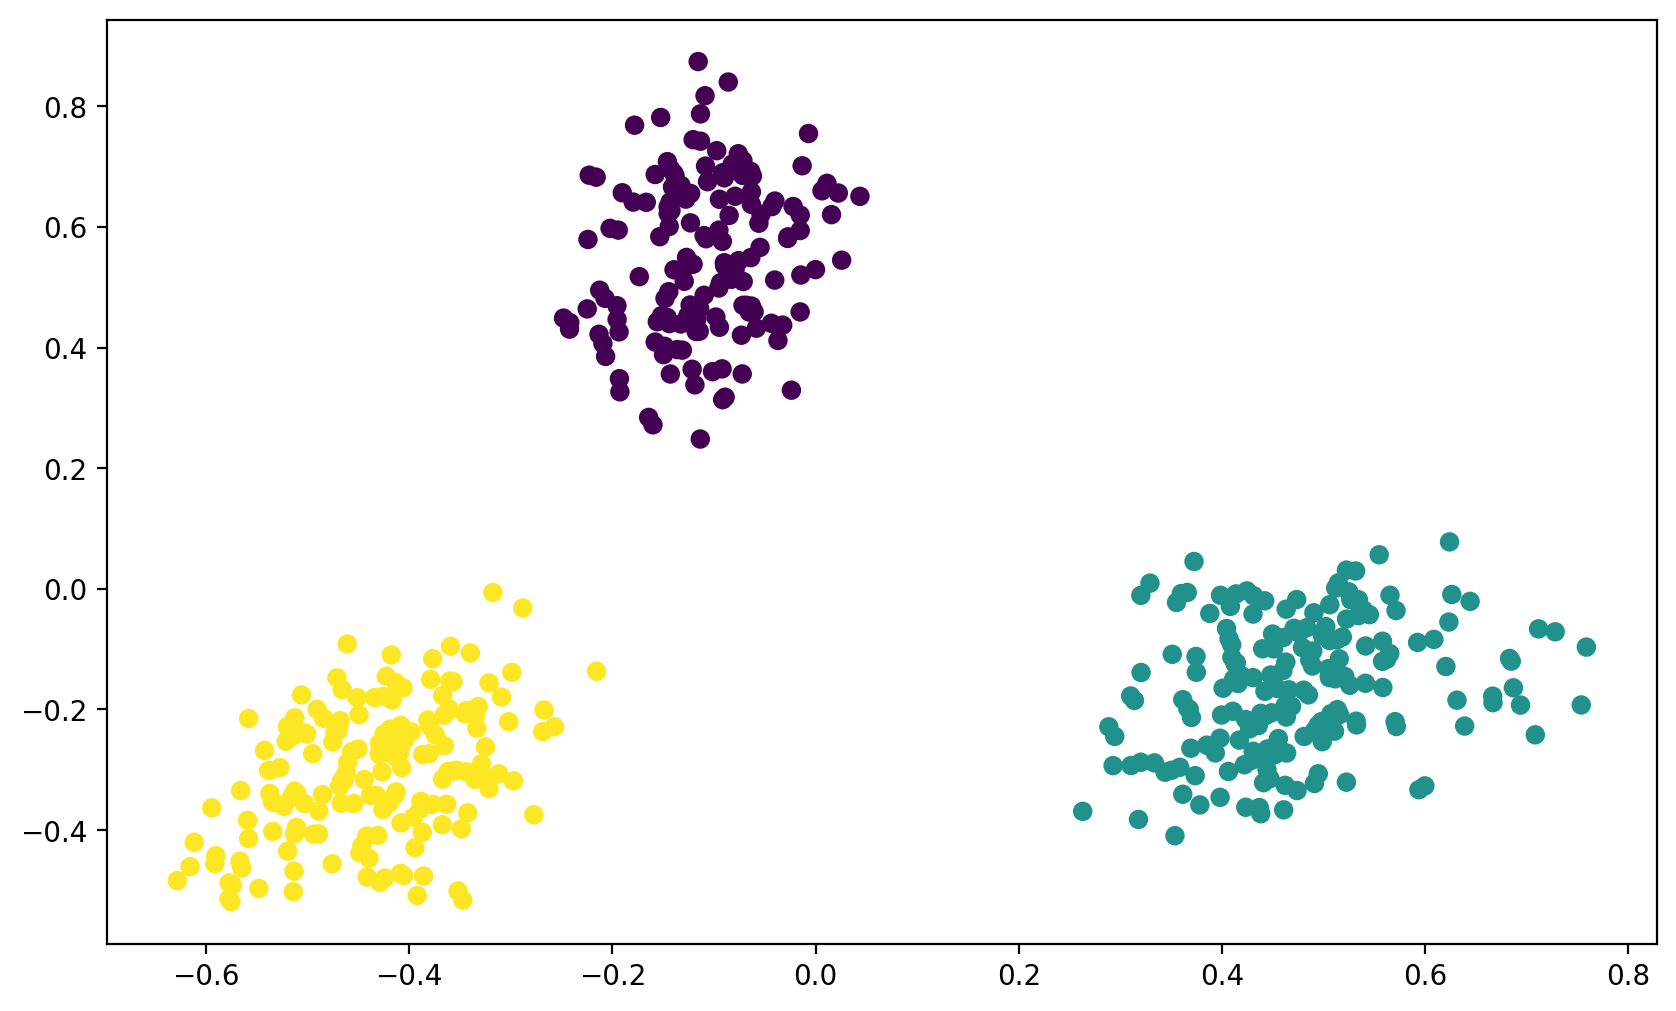

In [158]:
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(X_pca['P1'], X_pca['P2'], c = kmeans_predx) 
    # X_pca['P1']: x轴 <--> 第一主成分
    # X_pca['P2']: y轴 <--> 第二主成分
    # c = kmeans_predx: 设置点的颜色为对应的聚类效果
plt.show() 


- 对聚类结果进行分析和解释

In [159]:
clusters = dataframe.groupby('Cluster').mean(numeric_only=True)
    # groupby……: 按照Cluster分组
    # mean: 对每组的数值型列求平均

print('The clusters were analyzed based on the mean values of key variables -->\n')

clusters # 输出clusters

The clusters were analyzed based on the mean values of key variables -->



,Age,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality
Cluster,,,,,,,,
0,21.716216,2.439189,6.549324,6.423649,2.452027,2.689189,66.283784,5.472973
1,21.430108,2.451613,6.358065,6.033871,2.585484,2.473118,62.736559,5.102151
2,21.493976,2.493976,6.531928,5.528916,2.522289,2.246988,58.385542,5.554217
